#Import library

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
pip install -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 40.2 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=7c7bd3a7e94052379cc46943d3c82651559068bdcb1406b15b1f49a0dfedd360
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [6]:
import pandas as pd
import numpy as np
import ast

from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans

import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA

# Import

In [8]:
import sys
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
    !wget https://github.com/noon55555/final-project-ds-de/raw/master/data_phase2.csv

--2023-12-09 11:49:33--  https://github.com/noon55555/final-project-ds-de/raw/master/data_phase2.csv
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/noon55555/final-project-ds-de/master/data_phase2.csv [following]
--2023-12-09 11:49:33--  https://raw.githubusercontent.com/noon55555/final-project-ds-de/master/data_phase2.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5719343 (5.5M) [text/plain]
Saving to: ‘data_phase2.csv’

data_phase2.csv     100%[===================>]   5.45M  --.-KB/s    in 0.06s   

2023-12-09 11:49:33 (86.4 MB/s) - ‘data_phase2.csv’ saved [5719343/5719343]



In [9]:
df_add = pd.read_csv('/content/data_phase2.csv')
df_add

Title  \
0     Solid Waste Management Awareness, Attitude, an...   
1     Economic Decision across Regions of the Philip...   
2     Evaluating Philippine Students’ Class Particip...   
3                                    Energy and society   
4     Stimulating economic recovery through euro are...   
...                                                 ...   
1195       Webs, Nijenhuis operators, and heavenly PDEs   
1196  Improvement in the gelling properties of myofi...   
1197  Differences in the quality of black tea (Camel...   
1198  Waves in a forest: a random forest classifier ...   
1199  Development of composite electrospun films uti...   

                                               Abstract  \
0     © 2017, University of San Jose-Recoletos. All ...   
1     © 2017, University of San Jose-Recoletos. All ...   
2     © 2017, University of San Jose-Recoletos. All ...   
3                                                   NaN   
4     © Institute of Economic Research.Research back...   
...                                                 ...   
1195  © 2023 The Author(s). Published by IOP Publish...   
1196  © 2023 The AuthorsThis study investigated the ...   
1197  © 2023 The AuthorsSpring green tea is usually ...   
1198  © 2023 The Author(s). Published by IOP Publish...   
1199  © 2023 The Author(s)Electrospun films (ESF) ar...   

                                             University              Country  \
0     ['Silliman University', 'University of Negros ...      ['Philippines']   
1                   ['Southern Leyte State University']      ['Philippines']   
2                ['University of the Philippines Cebu']      ['Philippines']   
3                                                   NaN                  NaN   
4     ['Slovak Academy of Sciences', 'University of ...         ['Slovakia']   
...                                                 ...                  ...   
1195  ['Uniwersytet Kardynala Stefana Wyszynskiego w...           ['Poland']   
1196                  ['Hebei Agricultural University']            ['China']   
1197  ['University of Chinese Academy of Sciences', ...            ['China']   
1198  ['Indian Institute of Science Education and Re...  ['India', 'Canada']   
1199              ['Northeast Agricultural University']            ['China']   

                                          Index_authors  \
0                     ['Oracion E.G.', 'Madrigal D.V.']   
1                                      ['Ordiz J.E.G.']   
2                                           ['Yu S.Q.']   
3                                                   NaN   
4                       ['Siranova M.', 'Kotlebova J.']   
...                                                 ...   
1195                 ['Szereszewski A.', 'Panasyuk A.']   
1196  ['Wang X.', 'Zhang Q.', 'Liu X.', 'Hou Y.', 'S...   
1197  ['Liu C.', 'Jian G.', 'Zeng L.', 'Li J.', 'Li ...   
1198  ['Stenning D.C.', 'Shah N.', 'Knee A.M.', 'McI...   
1199  ['Dong Y.', 'Wang X.', 'Wang L.', 'Xu Z.', 'Zh...   

                                               Keywords  \
0     ['Attitude', 'Awareness', 'Practices', 'Solid ...   
1     ['economic disparity', 'multivariate analysis'...   
2              ['class participation', 'token economy']   
3                                                   NaN   
4     ['Growth pole', 'Network analysis', 'Unconvent...   
...                                                 ...   
1195  ['integrable PDEs', 'Nijenhuis operator', 'Ric...   
1196  ['Gel properties', 'Myofibrillar protein', 'Ph...   
1197  ['caffeine (PubChem CID: 2519)', 'Camellia sin...   
1198  ['gravitational waves', 'machine learning', 'p...   
1199  ['Electrospun nanofibers', 'Orally disintegrat...   

                                        PublicationName  \
0          Recoletos Multidisciplinary Research Journal   
1          Recoletos Multidisciplinary Research Journal   
2          Recoletos Multidisciplinary Research Journal   
3                

In [ ]:
df_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Title                  1200 non-null   object 
 1   Abstract               1129 non-null   object 
 2   University             1147 non-null   object 
 3   Country                1147 non-null   object 
 4   Index_authors          1186 non-null   object 
 5   Keywords               939 non-null    object 
 6   PublicationName        1200 non-null   object 
 7   Publisher              1200 non-null   object 
 8   Subject_Area           1200 non-null   object 
 9   Subject_Area_CodeType  1200 non-null   object 
 10  Citation_Type          1200 non-null   object 
 11  Citation_Number        1200 non-null   int64  
 12  Reference_number       1110 non-null   float64
 13  Year                   1103 non-null   float64
 14  Reference_title        1110 non-null   object 
dtypes: f

In [7]:
df = pd.read_csv('/content/drive/MyDrive/FinalProjectData/raw_scopus_data.csv')
df

Unnamed: 0         Id  \
0               0  201800000   
1               1  201800001   
2               2  201800002   
3               3  201800003   
4               4  201800004   
...           ...        ...   
20211       20211  202302885   
20212       20212  202302886   
20213       20213  202302887   
20214       20214  202302888   
20215       20215  202302889   

                                                Abstract  \
0                                                    NaN   
1      © 2018 The Institute of Electronics, Informati...   
2      © 2018 Elsevier LtdComputational fluid dynamic...   
3      © 2018 Elsevier B.V. A superhydrophobic/supero...   
4      © 2018 Elsevier B.V. A label-free electrochemi...   
...                                                  ...   
20211  © 2021 Elsevier B.V.Long-chain α-olefins (≥ C1...   
20212  © 2021 Taylor & Francis Group, LLC.Nowadays, f...   
20213  © 2021 The Author(s). Published by Informa UK ...   
20214  © 2021 Taylor & Francis.The effects of replaci...   
20215  © 2021 Informa UK Limited, trading as Taylor &...   

                                          Classification  Year  \
0                                       ['2700', 'MEDI']  2018   
1      [[{'$': '2208'}, {'$': '2504'}], [{'classifica...  2018   
2      [[{'classification-code': '522', 'classificati...  2018   
3      [[{'classification-code': '641.1', 'classifica...  2018   
4      [{'classification-code': '4', 'classification-...  2018   
...                                                  ...   ...   
20211  [[{'classification-code': '549.3', 'classifica...  2023   
20212  [[{'classification-code': '461.6', 'classifica...  2023   
20213                                   ['3304', 'SOCI']  2023   
20214  [{'classification-code': '73.9.4', 'classifica...  2023   
20215  [[{'classification-code': '70.12.6', 'classifi...  2023   

       Reference_number                                    Reference_title  \
0                  76.0  ['The untilled fields of public health', 'Comm...   
1                   4.0  ['Development of built-in low-profile antenna ...   
2                  42.0  ['Capture of CO2from combustion gases in a flu...   
3                  45.0  ['Ceramic membrane performance in microfiltrat...   
4                  55.0  ['The diagnosis and misdiagnosis of tuberculos...   
...                 ...                                                ...   
20211              63.0  ['The chemistry and kinetics of polyethylene p...   
20212             115.0  [' ', ' ', 'Food Safety, Food Fraud, and Food ...   
20213              76.0  ['The Rehabilitation of Jemaah Islamiyah Detai...   
20214              44.0  ['Effect of dietary carbohydrate to lipid rati...   
20215              58.0  ['What is the Impact of International Remittan...   

                                     Reference_title_str  Number_mainterm  \
0      The untilled fields of public health Committee...                0   
1      Development of built-in low-profile antenna fo...                8   
2      Capture of CO2from combustion gases in a fluid...                8   
3      Ceramic membrane performance in microfiltratio...                8   
4      The diagnosis and misdiagnosis of tuberculosis...               13   
...                                                  ...              ...   
20211  The chemistry and kinetics of polyethylene pyr...               10   
20212      Food Safety, Food Fraud, and Food Defense:...               15   
20213  The Rehabilitation of Jemaah Islamiyah Detaine...                0   
20214  Effect of dietary carbohydrate to lipid ratios...                0   
20215  What is the Impact of International Remittance...                0   

                                               Mainterms  ... Openaccess  \
0                                                    NaN  ...        0.0   
1      ['Antenna dimensions', 'Antenna performance', ...  ...        0.0   
2      ['Circulati

In [ ]:
dfp = df.copy()
dfp

Unnamed: 0         Id  \
0               0  201800000   
1               1  201800001   
2               2  201800002   
3               3  201800003   
4               4  201800004   
...           ...        ...   
20211       20211  202302885   
20212       20212  202302886   
20213       20213  202302887   
20214       20214  202302888   
20215       20215  202302889   

                                                   Title  \
0      Public health and international epidemiology f...   
1      Flexible Printed Active Antenna for Digital Te...   
2      Parametric study of hydrogen production via so...   
3      Superhydrophobic coating from fluoroalkylsilan...   
4      Electrochemical impedance-based DNA sensor usi...   
...                                                  ...   
20211  Long-chain bio-olefins production via oxidativ...   
20212  Recent Developments and Applications of Microf...   
20213  Social justice, education and peacebuilding: c...   
20214  Effects of black soldier fly (Hermetia illucen...   
20215  Effects of remittances on household poverty an...   

                                               Publisher  \
0                      Springer International Publishing   
1      Institute of Electrical and Electronics Engine...   
2                                           Elsevier Ltd   
3                                          Elsevier B.V.   
4                                          Elsevier B.V.   
...                                                  ...   
20211                                      Elsevier B.V.   
20212                            Taylor and Francis Ltd.   
20213                                          Routledge   
20214                            Taylor and Francis Ltd.   
20215                                          Routledge   

                                         PublicationName              Type  \
0      Radiology in Global Health: Strategies, Implem...      Book Chapter   
1        Progress in Electromagnetics Research Symposium  Conference Paper   
2                           Chemical Engineering Science           Article   
3                                Applied Surface Science           Article   
4                                 Analytica Chimica Acta           Article   
...                                                  ...               ...   
20211                                    Catalysis Today           Article   
20212           Critical Reviews in Analytical Chemistry            Review   
20213                                            Compare           Article   
20214                     Journal of Applied Aquaculture           Article   
20215                Journal of the Asia Pacific Economy           Article   

                                             Description  Openaccess  \
0                                                    NaN         0.0   
1      This paper presents the development of a flexi...         0.0   
2      Computational fluid dynamics was applied for s...         0.0   
3      A superhydrophobic/superoleophilic mesh was su...         0.0   
4      A label-free electrochemical DNA sensor based ...         0.0   
...                                                  ...         ...   
20211  Long-chain α-olefins (≥ C10) are normally appl...         0.0   
20212  Nowadays, food safety has become a major conce...         0.0   
20213  Education is increasingly becoming central to ...         1.0   
20214  The effects of replacing fish meal protein wit...         0.0   
20215  The author uses data from the Cambodia Socio-E...         0.0   

                                              Coppyrigth  Citation_Number  \
0                                                    NaN              1.0   
1      © 2018 The Institute of Electronics, Informati...              1.0   
2                                    © 2018 Elsevier Ltd             21.0   
3                                   © 2018 Elsevier B.V.             3

In [ ]:
col = ['Title', 'Abstract', 'Keywords', 'Subject_Area',
       'Subject_Area_Code', 'Type', 'Citation_Number', 'Year', 'Reference_title']

In [ ]:
dfp = dfp[col]
dfp

Title  \
0      Public health and international epidemiology f...   
1      Flexible Printed Active Antenna for Digital Te...   
2      Parametric study of hydrogen production via so...   
3      Superhydrophobic coating from fluoroalkylsilan...   
4      Electrochemical impedance-based DNA sensor usi...   
...                                                  ...   
20211  Long-chain bio-olefins production via oxidativ...   
20212  Recent Developments and Applications of Microf...   
20213  Social justice, education and peacebuilding: c...   
20214  Effects of black soldier fly (Hermetia illucen...   
20215  Effects of remittances on household poverty an...   

                                                Abstract  \
0                                                    NaN   
1      © 2018 The Institute of Electronics, Informati...   
2      © 2018 Elsevier LtdComputational fluid dynamic...   
3      © 2018 Elsevier B.V. A superhydrophobic/supero...   
4      © 2018 Elsevier B.V. A label-free electrochemi...   
...                                                  ...   
20211  © 2021 Elsevier B.V.Long-chain α-olefins (≥ C1...   
20212  © 2021 Taylor & Francis Group, LLC.Nowadays, f...   
20213  © 2021 The Author(s). Published by Informa UK ...   
20214  © 2021 Taylor & Francis.The effects of replaci...   
20215  © 2021 Informa UK Limited, trading as Taylor &...   

                                                Keywords  \
0                                                    NaN   
1                                                    NaN   
2      ['Circulating fluidized bed', 'Computational f...   
3      ['Encapsulation', 'Fluoroalkylsilane', 'Natura...   
4      ['acpcPNA', 'Electrochemical impedance spectro...   
...                                                  ...   
20211  ['Long-chain olefins', 'Mesoporous KIT-6', 'Ol...   
20212  ['Biological hazards', 'chemical hazards', 'fo...   
20213  ['conflict', 'Education', 'peacebuilding', 'so...   
20214  ['Anabas testudineus', 'Black soldier fly', 'f...   
20215  ['Cambodia', 'consumption', 'expenditure', 'Im...   

                                            Subject_Area  \
0                                     ['Medicine (all)']   
1      ['Electrical and Electronic Engineering', 'Ele...   
2      ['Chemistry (all)', 'Chemical Engineering (all...   
3      ['Chemistry (all)', 'Condensed Matter Physics'...   
4      ['Analytical Chemistry', 'Biochemistry', 'Envi...   
...                                                  ...   
20211                   ['Catalysis', 'Chemistry (all)']   
20212                           ['Analytical Chemistry']   
20213                                      ['Education']   
20214                     ['Ecology', 'Aquatic Science']   
20215  ['Geography, Planning and Development', 'Devel...   

                              Subject_Area_Code              Type  \
0                                      ['MEDI']      Book Chapter   
1                              ['ENGI', 'MATE']  Conference Paper   
2                      ['CHEM', 'CENG', 'ENGI']           Article   
3      ['CHEM', 'PHYS', 'PHYS', 'PHYS', 'MATE']           Article   
4              ['CHEM', 'BIOC', 'ENVI', 'CHEM']           Article   
...                                         ...               ...   
20211                          ['CENG', 'CHEM']           Article   
20212                                  ['CHEM']            Review   
20213                                  ['SOCI']           Article   
20214                          ['ENVI', 'AGRI']           Article   
20215                  ['SOCI', 'SOCI', 'SOCI']           Article   

       Citation_Number  Year  \
0                  1.0  2018   
1                  1.0  2018   
2                 21.0  2018   
3                 37.0  2018   
4                 68.0  2018   
...                ...   ...   
20211              3.0  2023   
20212             11.0  2023   
20213              5.0  2023   
20214             

In [ ]:
col_add = ['Title', 'Abstract', 'Keywords', 'Subject_Area',
       'Subject_Area_CodeType', 'Citation_Type', 'Citation_Number', 'Year', 'Reference_title']

In [ ]:
df_add = df_add[col_add]
df_add

Title  \
0     Solid Waste Management Awareness, Attitude, an...   
1     Economic Decision across Regions of the Philip...   
2     Evaluating Philippine Students’ Class Particip...   
3                                    Energy and society   
4     Stimulating economic recovery through euro are...   
...                                                 ...   
1195       Webs, Nijenhuis operators, and heavenly PDEs   
1196  Improvement in the gelling properties of myofi...   
1197  Differences in the quality of black tea (Camel...   
1198  Waves in a forest: a random forest classifier ...   
1199  Development of composite electrospun films uti...   

                                               Abstract  \
0     © 2017, University of San Jose-Recoletos. All ...   
1     © 2017, University of San Jose-Recoletos. All ...   
2     © 2017, University of San Jose-Recoletos. All ...   
3                                                   NaN   
4     © Institute of Economic Research.Research back...   
...                                                 ...   
1195  © 2023 The Author(s). Published by IOP Publish...   
1196  © 2023 The AuthorsThis study investigated the ...   
1197  © 2023 The AuthorsSpring green tea is usually ...   
1198  © 2023 The Author(s). Published by IOP Publish...   
1199  © 2023 The Author(s)Electrospun films (ESF) ar...   

                                               Keywords  \
0     ['Attitude', 'Awareness', 'Practices', 'Solid ...   
1     ['economic disparity', 'multivariate analysis'...   
2              ['class participation', 'token economy']   
3                                                   NaN   
4     ['Growth pole', 'Network analysis', 'Unconvent...   
...                                                 ...   
1195  ['integrable PDEs', 'Nijenhuis operator', 'Ric...   
1196  ['Gel properties', 'Myofibrillar protein', 'Ph...   
1197  ['caffeine (PubChem CID: 2519)', 'Camellia sin...   
1198  ['gravitational waves', 'machine learning', 'p...   
1199  ['Electrospun nanofibers', 'Orally disintegrat...   

                                           Subject_Area  \
0                                 ['Multidisciplinary']   
1                                 ['Multidisciplinary']   
2                                 ['Multidisciplinary']   
3     ['Renewable Energy, Sustainability and the Env...   
4     ['Economics, Econometrics and Finance (miscell...   
...                                                 ...   
1195          ['Physics and Astronomy (miscellaneous)']   
1196           ['Analytical Chemistry', 'Food Science']   
1197           ['Analytical Chemistry', 'Food Science']   
1198          ['Physics and Astronomy (miscellaneous)']   
1199           ['Analytical Chemistry', 'Food Science']   

         Subject_Area_CodeType Citation_Type  Citation_Number    Year  \
0                     ['MULT']       Article                9  2017.0   
1                     ['MULT']       Article                0  2017.0   
2                     ['MULT']       Article                0  2017.0   
3     ['SOCI', 'ENER', 'ENVI']        Review                1     NaN   
4                     ['ECON']       Article                0  2011.0   
...                        ...           ...              ...     ...   
1195                  ['PHYS']       Article                1  2023.0   
1196          ['CHEM', 'AGRI']       Article                0  2023.0   
1197          ['CHEM', 'AGRI']       Article                0  2023.0   
1198                  ['PHYS']       Article                0  2023.0   
1199          ['CHEM', 'AGRI']       Article                0  2023.0   

                                        Reference_title  
0     ['Assessment of secondary school students’ Kno...  
1     [None, None, None, 'Does crime affect economic...  
2     ['How Academy Members Teach the Business Polic...  
3                                                   NaN  
4     ['Global growth poles in a multipolar wor

In [ ]:
dfp.isnull().sum()

Title                   1
Abstract              665
Keywords             3762
Subject_Area            0
Subject_Area_Code       0
Type                    0
Citation_Number         4
Year                    0
Reference_title       411
dtype: int64

In [ ]:
df_add = df_add.rename(columns={'Subject_Area_CodeType': 'Subject_Area_Code', 'Citation_Type': 'Type'})
df_add.isnull().sum()

Title                  0
Abstract              71
Keywords             261
Subject_Area           0
Subject_Area_Code      0
Type                   0
Citation_Number        0
Year                  97
Reference_title       90
dtype: int64

In [ ]:
df1 = pd.concat([dfp, df_add], axis=0)
df1

Title  \
0     Public health and international epidemiology f...   
1     Flexible Printed Active Antenna for Digital Te...   
2     Parametric study of hydrogen production via so...   
3     Superhydrophobic coating from fluoroalkylsilan...   
4     Electrochemical impedance-based DNA sensor usi...   
...                                                 ...   
1195       Webs, Nijenhuis operators, and heavenly PDEs   
1196  Improvement in the gelling properties of myofi...   
1197  Differences in the quality of black tea (Camel...   
1198  Waves in a forest: a random forest classifier ...   
1199  Development of composite electrospun films uti...   

                                               Abstract  \
0                                                   NaN   
1     © 2018 The Institute of Electronics, Informati...   
2     © 2018 Elsevier LtdComputational fluid dynamic...   
3     © 2018 Elsevier B.V. A superhydrophobic/supero...   
4     © 2018 Elsevier B.V. A label-free electrochemi...   
...                                                 ...   
1195  © 2023 The Author(s). Published by IOP Publish...   
1196  © 2023 The AuthorsThis study investigated the ...   
1197  © 2023 The AuthorsSpring green tea is usually ...   
1198  © 2023 The Author(s). Published by IOP Publish...   
1199  © 2023 The Author(s)Electrospun films (ESF) ar...   

                                               Keywords  \
0                                                   NaN   
1                                                   NaN   
2     ['Circulating fluidized bed', 'Computational f...   
3     ['Encapsulation', 'Fluoroalkylsilane', 'Natura...   
4     ['acpcPNA', 'Electrochemical impedance spectro...   
...                                                 ...   
1195  ['integrable PDEs', 'Nijenhuis operator', 'Ric...   
1196  ['Gel properties', 'Myofibrillar protein', 'Ph...   
1197  ['caffeine (PubChem CID: 2519)', 'Camellia sin...   
1198  ['gravitational waves', 'machine learning', 'p...   
1199  ['Electrospun nanofibers', 'Orally disintegrat...   

                                           Subject_Area  \
0                                    ['Medicine (all)']   
1     ['Electrical and Electronic Engineering', 'Ele...   
2     ['Chemistry (all)', 'Chemical Engineering (all...   
3     ['Chemistry (all)', 'Condensed Matter Physics'...   
4     ['Analytical Chemistry', 'Biochemistry', 'Envi...   
...                                                 ...   
1195          ['Physics and Astronomy (miscellaneous)']   
1196           ['Analytical Chemistry', 'Food Science']   
1197           ['Analytical Chemistry', 'Food Science']   
1198          ['Physics and Astronomy (miscellaneous)']   
1199           ['Analytical Chemistry', 'Food Science']   

                             Subject_Area_Code              Type  \
0                                     ['MEDI']      Book Chapter   
1                             ['ENGI', 'MATE']  Conference Paper   
2                     ['CHEM', 'CENG', 'ENGI']           Article   
3     ['CHEM', 'PHYS', 'PHYS', 'PHYS', 'MATE']           Article   
4             ['CHEM', 'BIOC', 'ENVI', 'CHEM']           Article   
...                                        ...               ...   
1195                                  ['PHYS']           Article   
1196                          ['CHEM', 'AGRI']           Article   
1197                          ['CHEM', 'AGRI']           Article   
1198                                  ['PHYS']           Article   
1199                          ['CHEM', 'AGRI']           Article   

      Citation_Number    Year  \
0                 1.0  2018.0   
1                 1.0  2018.0   
2                21.0  2018.0   
3                37.0  2018.0   
4                68.0  2018.0   
...               ...     ...   
1195              1.0  2023.0   
1196              0.0  2023.0   
1197              0.0  2023.0   
1198              0.0  2023.0   
1199              0.0  2023.0   



## make str to list

In [ ]:
import ast
df1['Subject_Area_Code'] = df1['Subject_Area_Code'].apply(ast.literal_eval)
df1['Subject_Area'] = df1['Subject_Area'].apply(ast.literal_eval)
df1['Keywords'] = df1['Keywords'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else None)

In [ ]:
df1['Reference_title'] = df1['Reference_title'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else [])

In [ ]:
df1

Title  \
0     Public health and international epidemiology f...   
1     Flexible Printed Active Antenna for Digital Te...   
2     Parametric study of hydrogen production via so...   
3     Superhydrophobic coating from fluoroalkylsilan...   
4     Electrochemical impedance-based DNA sensor usi...   
...                                                 ...   
1195       Webs, Nijenhuis operators, and heavenly PDEs   
1196  Improvement in the gelling properties of myofi...   
1197  Differences in the quality of black tea (Camel...   
1198  Waves in a forest: a random forest classifier ...   
1199  Development of composite electrospun films uti...   

                                               Abstract  \
0                                                   NaN   
1     © 2018 The Institute of Electronics, Informati...   
2     © 2018 Elsevier LtdComputational fluid dynamic...   
3     © 2018 Elsevier B.V. A superhydrophobic/supero...   
4     © 2018 Elsevier B.V. A label-free electrochemi...   
...                                                 ...   
1195  © 2023 The Author(s). Published by IOP Publish...   
1196  © 2023 The AuthorsThis study investigated the ...   
1197  © 2023 The AuthorsSpring green tea is usually ...   
1198  © 2023 The Author(s). Published by IOP Publish...   
1199  © 2023 The Author(s)Electrospun films (ESF) ar...   

                                               Keywords  \
0                                                  None   
1                                                  None   
2     [Circulating fluidized bed, Computational flui...   
3     [Encapsulation, Fluoroalkylsilane, Natural rub...   
4     [acpcPNA, Electrochemical impedance spectrosco...   
...                                                 ...   
1195  [integrable PDEs, Nijenhuis operator, Ricci fl...   
1196  [Gel properties, Myofibrillar protein, Phospho...   
1197  [caffeine (PubChem CID: 2519), Camellia sinens...   
1198  [gravitational waves, machine learning, parame...   
1199  [Electrospun nanofibers, Orally disintegrating...   

                                           Subject_Area  \
0                                      [Medicine (all)]   
1     [Electrical and Electronic Engineering, Electr...   
2     [Chemistry (all), Chemical Engineering (all), ...   
3     [Chemistry (all), Condensed Matter Physics, Ph...   
4     [Analytical Chemistry, Biochemistry, Environme...   
...                                                 ...   
1195            [Physics and Astronomy (miscellaneous)]   
1196               [Analytical Chemistry, Food Science]   
1197               [Analytical Chemistry, Food Science]   
1198            [Physics and Astronomy (miscellaneous)]   
1199               [Analytical Chemistry, Food Science]   

                   Subject_Area_Code              Type  Citation_Number  \
0                             [MEDI]      Book Chapter              1.0   
1                       [ENGI, MATE]  Conference Paper              1.0   
2                 [CHEM, CENG, ENGI]           Article             21.0   
3     [CHEM, PHYS, PHYS, PHYS, MATE]           Article             37.0   
4           [CHEM, BIOC, ENVI, CHEM]           Article             68.0   
...                              ...               ...              ...   
1195                          [PHYS]           Article              1.0   
1196                    [CHEM, AGRI]           Article              0.0   
1197                    [CHEM, AGRI]           Article              0.0   
1198                          [PHYS]           Article              0.0   
1199                    [CHEM, AGRI]           Article              0.0   

        Year                                    Reference_title  
0     2018.0  [The untilled fields of public health, Committ...  
1     2018.0  [Development of built-in low-profile antenna f...  
2     2018.0  [Capture of CO2from combustion gases in a flui...  
3     2018.0  [Ceramic membrane performance in mi

In [ ]:
df1 = df1.dropna(subset=['Keywords','Title','Abstract']).reset_index(drop=True)
df1.isnull().sum()

Title                 0
Abstract              0
Keywords              0
Subject_Area          0
Subject_Area_Code     0
Type                  0
Citation_Number       4
Year                 23
Reference_title       0
dtype: int64

In [ ]:
df1 = df1.drop_duplicates(subset='Title')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17253 entries, 0 to 17264
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              17253 non-null  object 
 1   Abstract           17253 non-null  object 
 2   Keywords           17253 non-null  object 
 3   Subject_Area       17253 non-null  object 
 4   Subject_Area_Code  17253 non-null  object 
 5   Type               17253 non-null  object 
 6   Citation_Number    17249 non-null  float64
 7   Year               17230 non-null  float64
 8   Reference_title    17253 non-null  object 
dtypes: float64(2), object(7)
memory usage: 1.3+ MB


# EDA

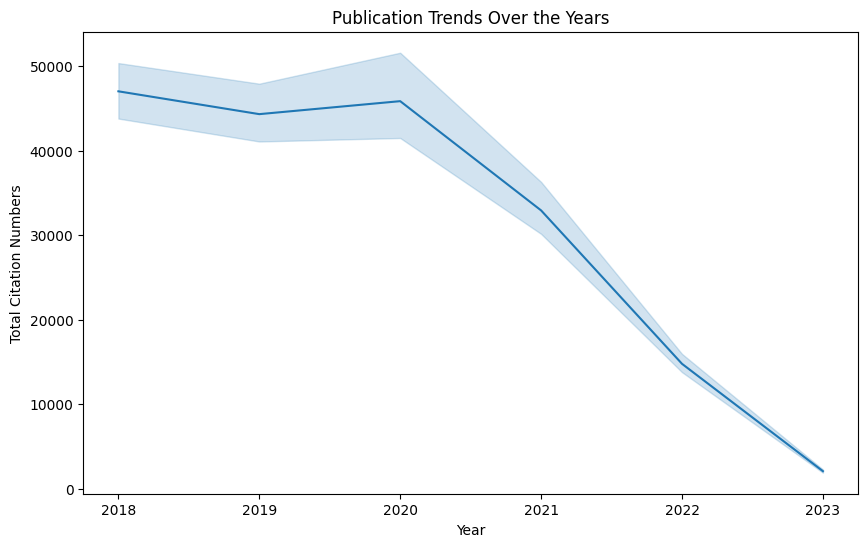

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Year' and 'Citation_Number' are columns in your DataFrame
# Load your dataset
# df = pd.read_csv('your_dataset.csv')

# Visualize publication trends over the years
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Citation_Number', data=df[df['Year']>=2018], estimator='sum')
plt.title('Publication Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Citation Numbers')
plt.show()


In [ ]:
df[df['Number_authors']>2000]

Unnamed: 0         Id  \
40             40  201800040   
43             43  201800043   
110           110  201800110   
111           111  201800111   
118           118  201800118   
...           ...        ...   
18166       18166  202300840   
18169       18169  202300843   
18747       18747  202301421   
18751       18751  202301425   
18965       18965  202301639   

                                                   Title  \
40     Observation of Medium-Induced Modifications of...   
43     Search for Leptoquarks Coupled to Third-Genera...   
110    Angular analysis of the decay B+ →k+μ+μ- in pr...   
111    Search for pair-produced resonances decaying t...   
118    Event shape variables measured using multijet ...   
...                                                  ...   
18166  Search for CP violation using (Formula present...   
18169  Search for long-lived particles decaying to a ...   
18747  Publisher Correction: Observation of triple J/...   
18751  Observation of triple J/ψ meson production in ...   
18965  Erratum: Measurement of prompt and nonprompt c...   

                                               Publisher  \
40               American Physical Societyrevtex@aps.org   
43               American Physical Societyrevtex@aps.org   
110              American Physical Societyrevtex@aps.org   
111                            American Physical Society   
118                   Springer Verlagservice@springer.de   
...                                                  ...   
18166  Springer Science and Business Media Deutschlan...   
18169  Springer Science and Business Media Deutschlan...   
18747                                    Nature Research   
18751                                    Nature Research   
18965                               Institute for Ionics   

                      PublicationName     Type  \
40            Physical Review Letters  Article   
43            Physical Review Letters  Article   
110                 Physical Review D  Article   
111                 Physical Review D  Article   
118    Journal of High Energy Physics  Article   
...                               ...      ...   
18166  Journal of High Energy Physics  Article   
18169  Journal of High Energy Physics  Article   
18747                  Nature Physics  Erratum   
18751                  Nature Physics  Article   
18965     European Physical Journal C  Erratum   

                                             Description  Openaccess  \
40     Measurements of fragmentation functions for je...         1.0   
43     Three of the most significant measured deviati...         1.0   
110    The angular distribution of the flavor-changin...         1.0   
111    A general search for the pair production of re...         1.0   
118    The study of global event shape variables can ...         1.0   
...                                                  ...         ...   
18166  Results are presented on a search for CP viola...         1.0   
18169  An inclusive search for long-lived exotic part...         1.0   
18747  Correction to: Nature Physics. Published onlin...         1.0   
18751  Protons consist of three valence quarks, two u...         1.0   
18965  In Fig. 3, the y axis titles were mistakenly w...         1.0   

                                              Coppyrigth  Citation_Number  \
40     © 2018 CERN, for the CMS Collaboration. Publis...             39.0   
43     © 2018 CERN.for the CMS Collaboration. Publish...             51.0   
110                                         © 2018 CERN.             27.0   
111                                         © 2018 CERN.             34.0   
118                               © 2018, The Author(s).             19.0   
...                                                  ...              ...   
18166                             © 2023, The Author(s).              1.0   
18169                             © 2023, The Author(s).              1.0   
18747                

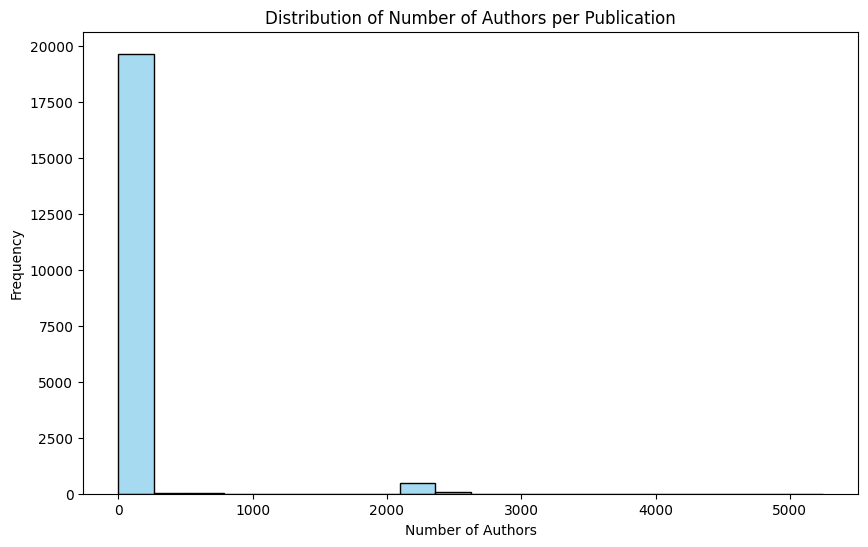

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Number_authors'], bins=20, kde=False, color='skyblue')
plt.title('Distribution of Number of Authors per Publication')
plt.xlabel('Number of Authors')
plt.ylabel('Frequency')
plt.show()

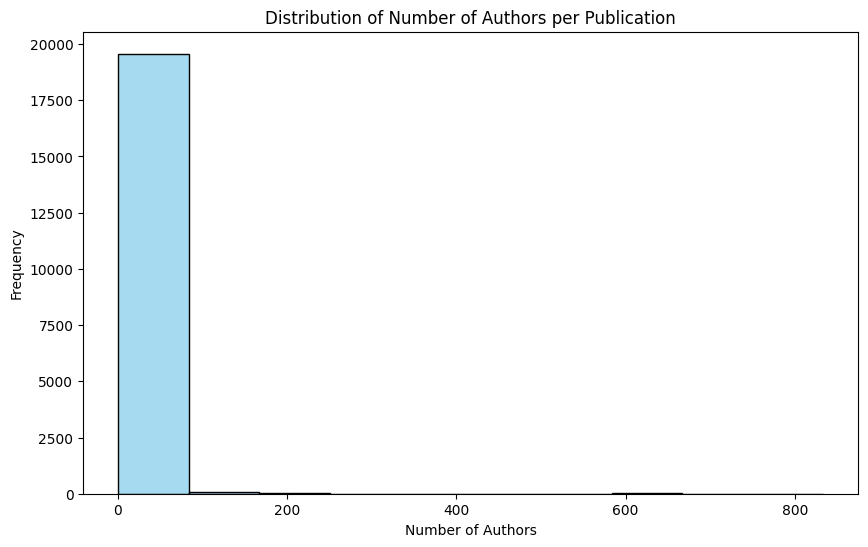

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Number_authors']<2000]['Number_authors'], bins=10, kde=False, color='skyblue')
plt.title('Distribution of Number of Authors per Publication')
plt.xlabel('Number of Authors')
plt.ylabel('Frequency')
plt.show()

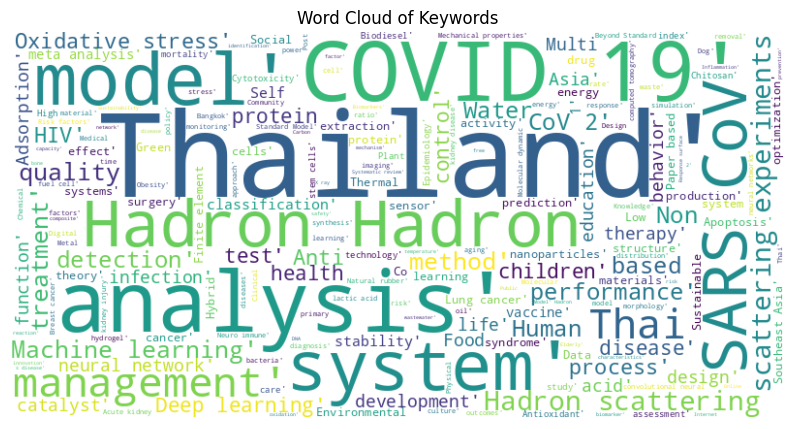

In [ ]:
from wordcloud import WordCloud

# Assuming 'Keywords' is a column containing comma-separated keywords
keywords_text = ' '.join(df['Keywords'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(keywords_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Keywords')
plt.show()

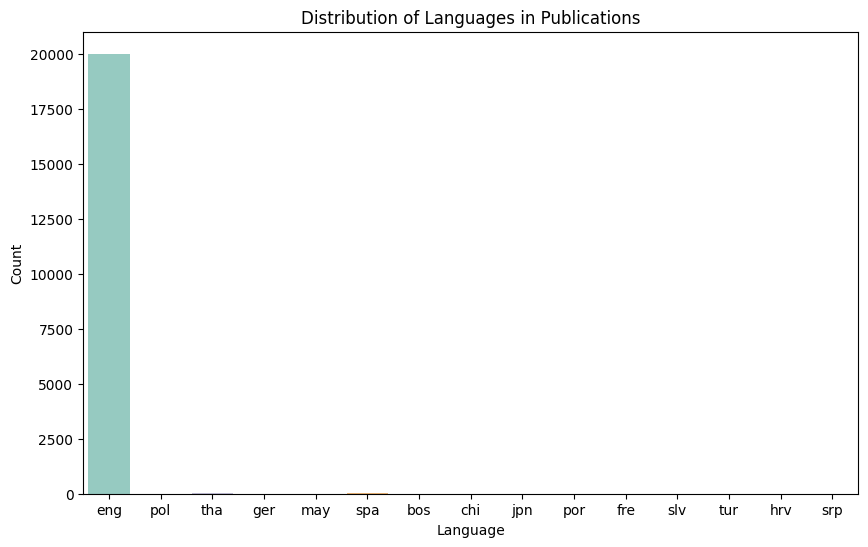

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Language', data=df, palette='Set3')
plt.title('Distribution of Languages in Publications')
plt.xlabel('Language')
plt.ylabel('Count')
plt.show()

In [ ]:
df['Subject_Area_Code'].iloc[0]

"['MEDI']"

In [ ]:
df2 = df[df['Year']>=2018]

# Machine Learning

## SentenceTransformer (Huggingface)

In [ ]:
embedder = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')

.gitattributes:   0%|          | 0.00/345 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.01k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/555 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/265M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/505 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

## Text preprocessing

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

def preprocess_text(raw_text):
    printable_text = re.sub(r'[^\x00-\x7F]+', '', raw_text)
    tokens = word_tokenize(printable_text.lower())
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    processed_text = ' '.join(tokens)

    return processed_text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df1['Combined_Text'] = df1['Title'] + ' ' + df1['Abstract'] + ' ' + df1['Keywords'].fillna('').apply(lambda x: ', '.join(x) if isinstance(x, list) else str(x))
df1['Combined_Text'] = df1['Combined_Text'].apply(preprocess_text)
corpus2 = df1['Combined_Text'].tolist()
corpus_embeddings2 = embedder.encode(corpus2)

##Find Optimal n_cluster by Plot Evaulate Score
- Inertia
- Silhouette Scores
- Davies-Bouldin Scores

In [ ]:
def find_elbow_point(values):
    diff_values = np.diff(values, 2)
    return np.argmax(diff_values) + 2

# Calculate Davies-Bouldin scores and Inertia values
inertia_values = []
davies_bouldin_scores = []
silhouette_scores = []
num_clusters_range = range(2, min(16, len(corpus_embeddings2)))

for num_clusters in num_clusters_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_assignment = kmeans.fit_predict(corpus_embeddings2)

    davies_bouldin = davies_bouldin_score(corpus_embeddings2, cluster_assignment)
    inertia = kmeans.inertia_
    silhouette = silhouette_score(corpus_embeddings2, cluster_assignment)

    davies_bouldin_scores.append(davies_bouldin)
    inertia_values.append(inertia)
    silhouette_scores.append(silhouette)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

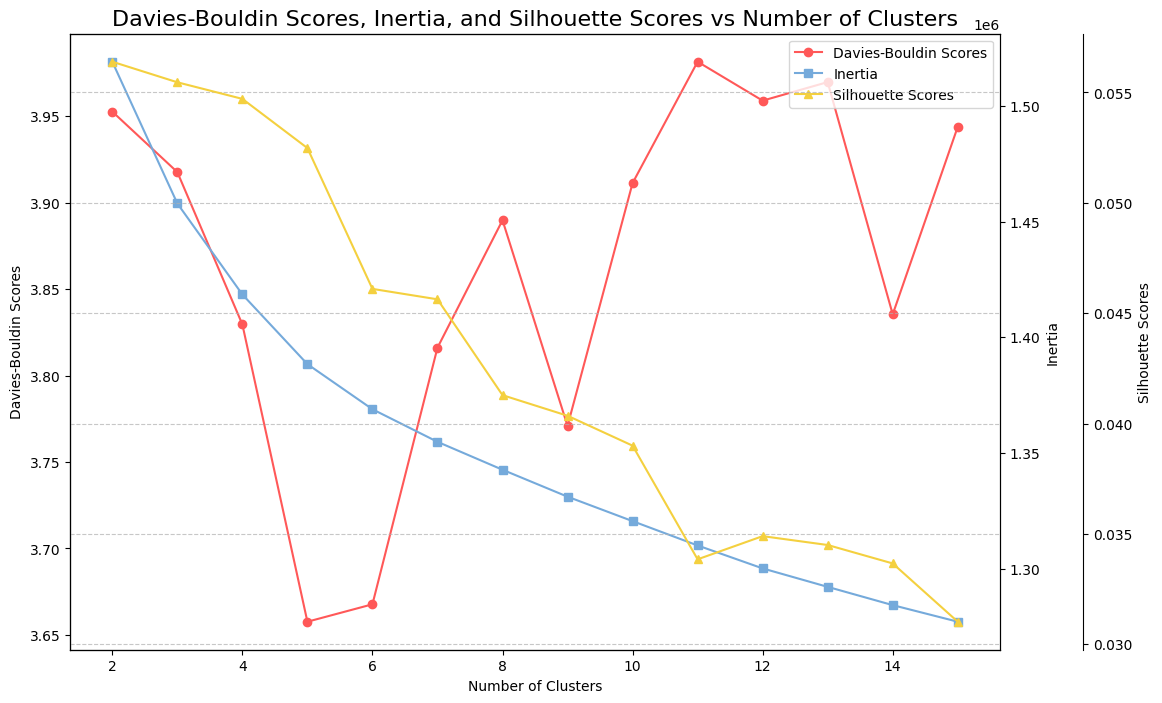

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot Davies-Bouldin scores
ax1.plot(num_clusters_range, davies_bouldin_scores, label='Davies-Bouldin Scores', color='#FF5858', marker='o')

ax1.set_ylabel('Davies-Bouldin Scores')
ax1.set_xlabel('Number of Clusters')

# Plot Inertia
ax2 = ax1.twinx()
ax2.plot(num_clusters_range, inertia_values, label='Inertia', color='#75AADB', marker='s')

ax2.set_ylabel('Inertia')

# Plot Silhouette scores
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
ax3.plot(num_clusters_range, silhouette_scores, label='Silhouette Scores', color='#F4D03F', marker='^')

ax3.set_ylabel('Silhouette Scores')

# Title and grid
plt.title('Davies-Bouldin Scores, Inertia, and Silhouette Scores vs Number of Clusters', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)

# Legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()

# Combine legends and adjust positioning
lines += lines2 + lines3
labels += labels2 + labels3

ax1.legend(lines, labels, loc='upper right')

# Show the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

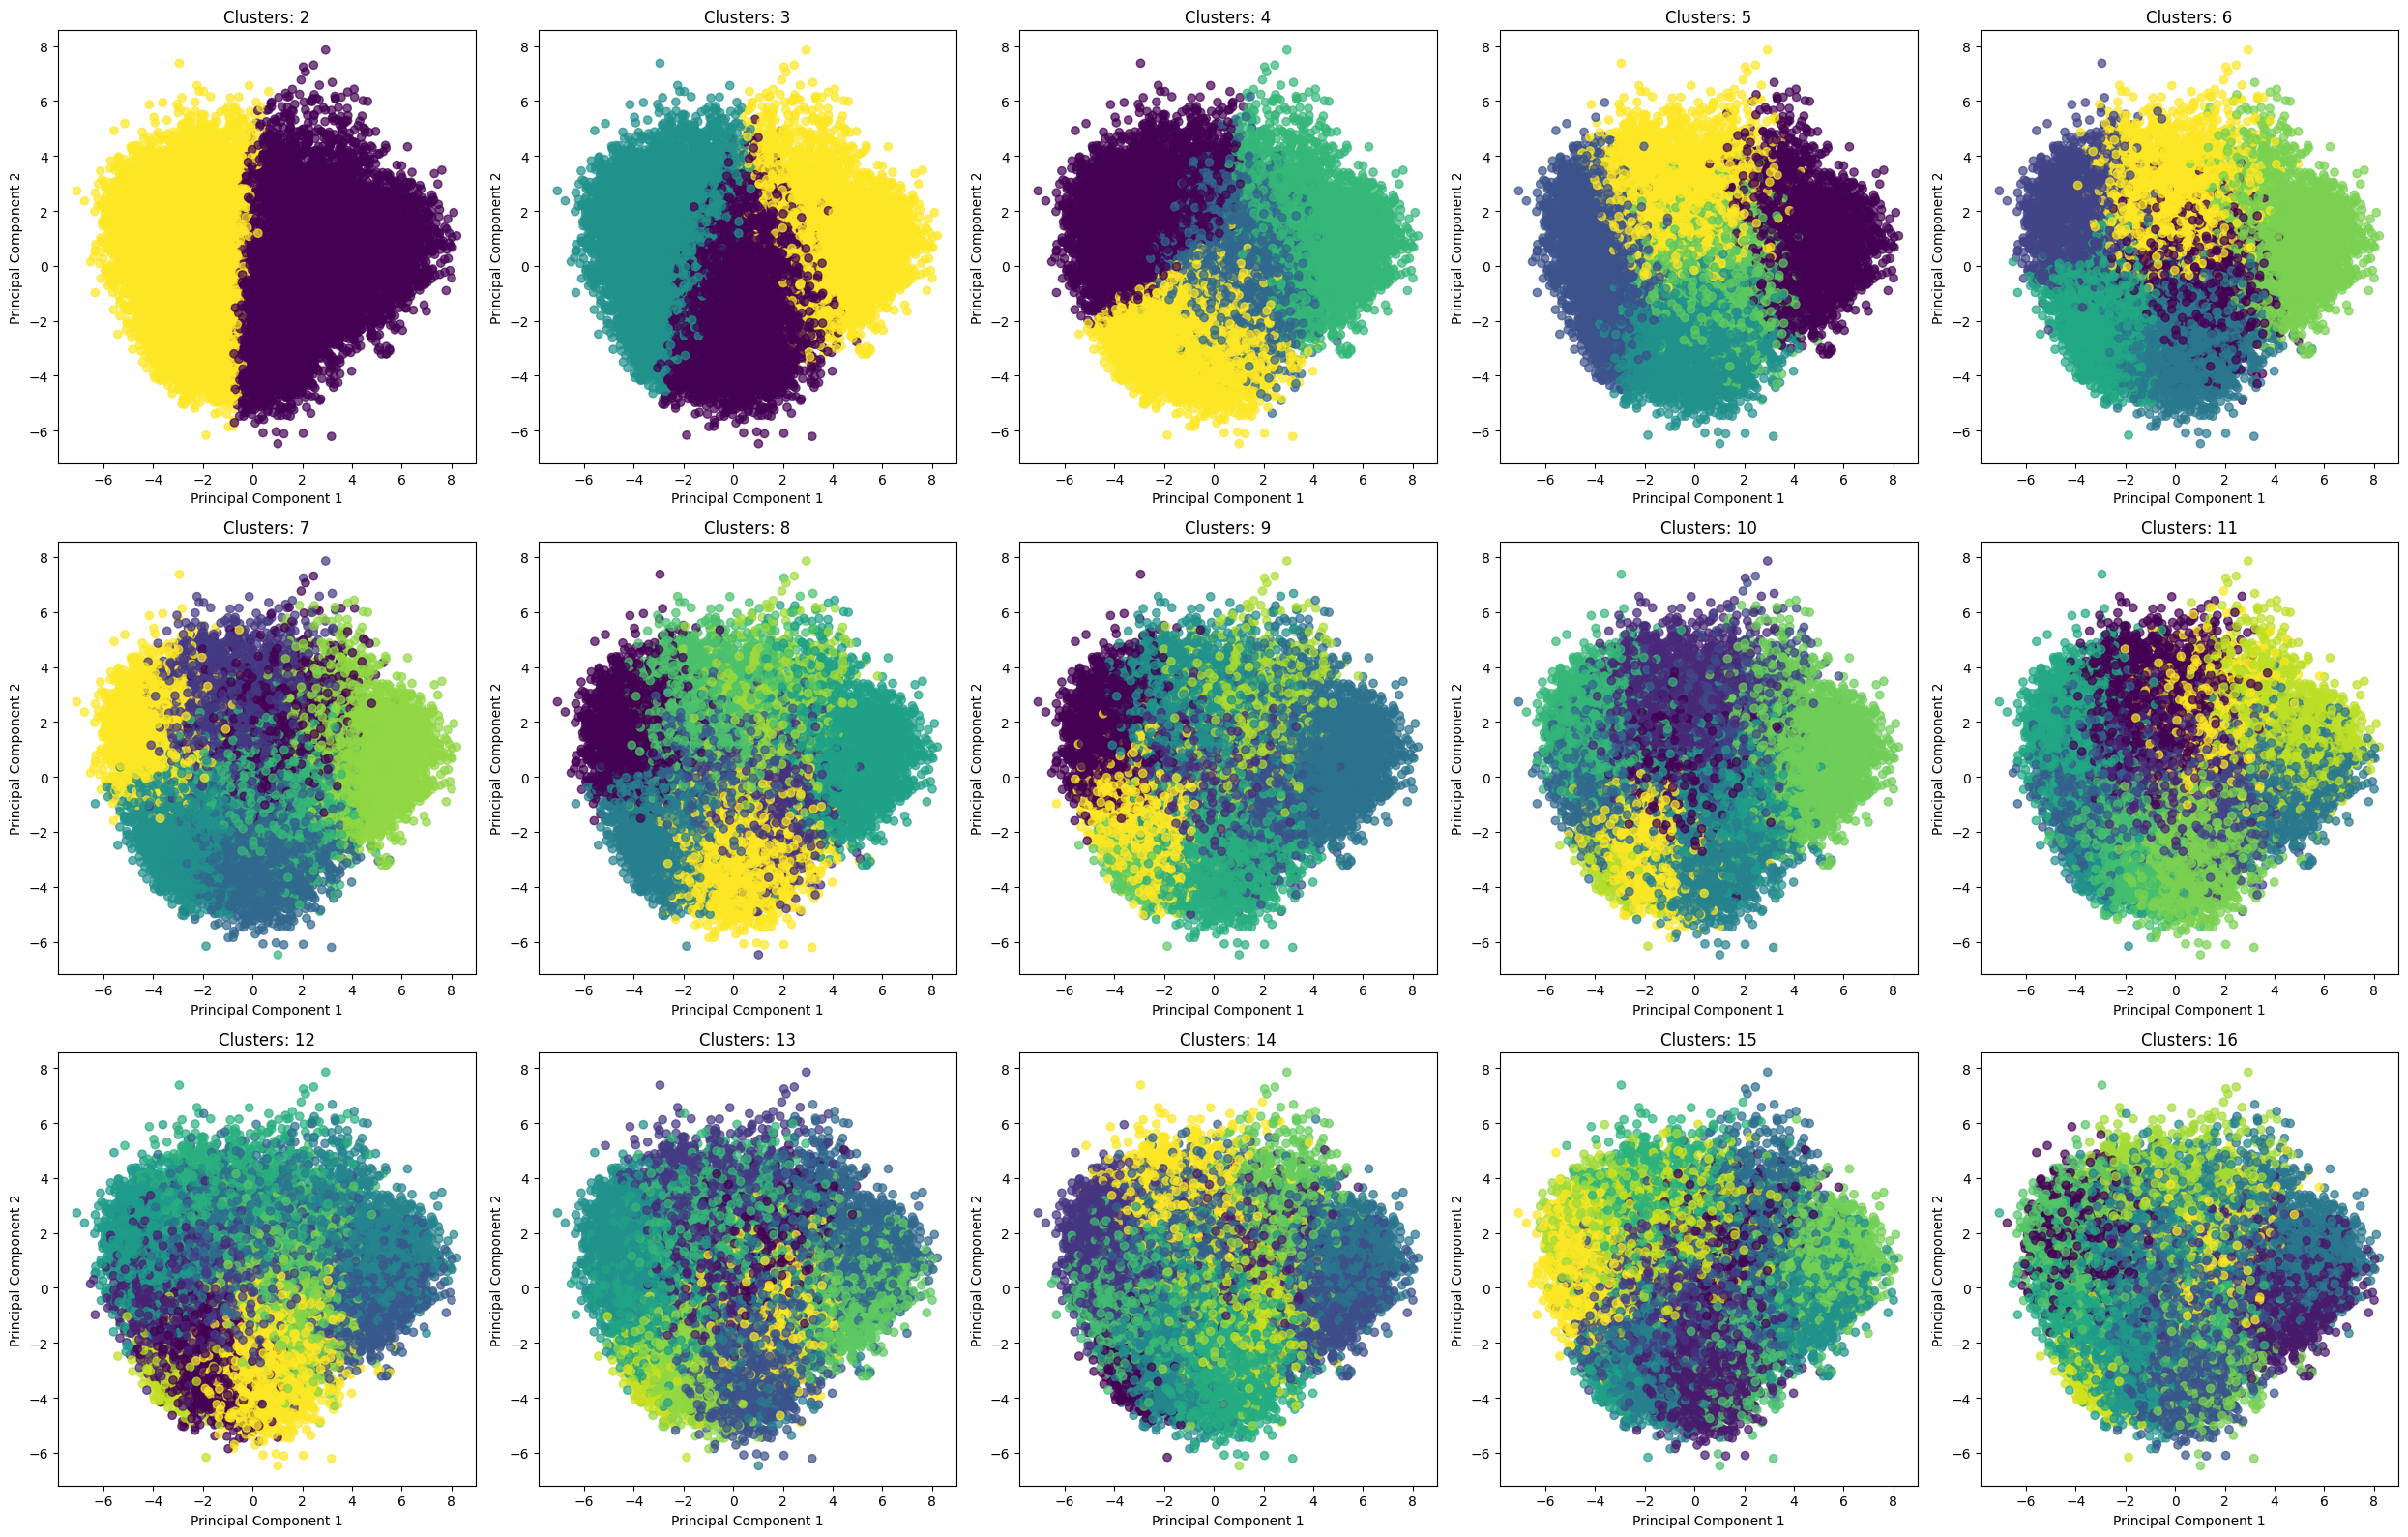

In [ ]:
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(corpus_embeddings2)

# Set up the grid for subplots
num_rows, num_cols = 3, 5
fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 16))

# Loop through the number of clusters
for i in range(2, 2 + num_rows * num_cols):
    row = (i - 2) // num_cols
    col = (i - 2) % num_cols

    # Fit KMeans with the current number of clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    cluster_assignment = kmeans.fit_predict(corpus_embeddings2)

    # Create a DataFrame for visualization
    df_visualization = pd.DataFrame({
        'PC1': reduced_embeddings[:, 0],
        'PC2': reduced_embeddings[:, 1],
        'Cluster': cluster_assignment
    })

    # Scatter plot on the current subplot
    scatter = axes[row, col].scatter(df_visualization['PC1'], df_visualization['PC2'], c=df_visualization['Cluster'], cmap='viridis', alpha=0.7)
    axes[row, col].set_title(f'Clusters: {i}')
    axes[row, col].set_xlabel('Principal Component 1')
    axes[row, col].set_ylabel('Principal Component 2')

# Adjust layout
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


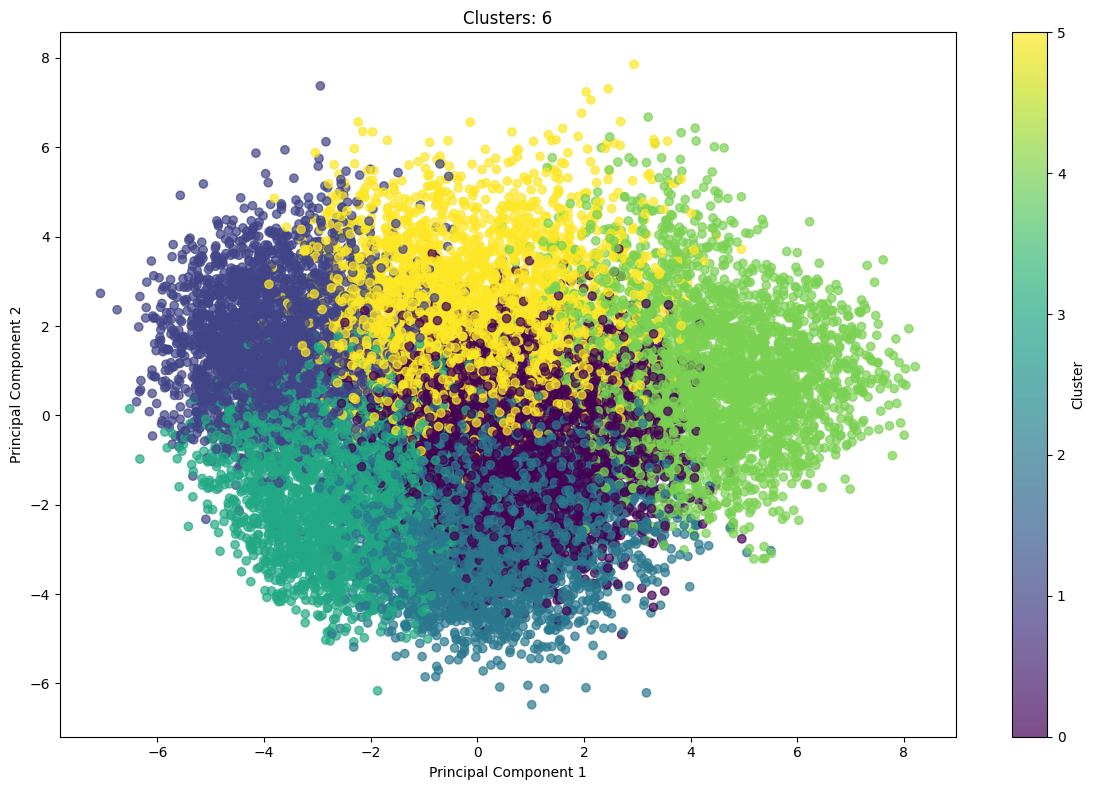

In [ ]:
num_rows, num_cols = 1, 1
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

k = 6
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_assignment = kmeans.fit_predict(corpus_embeddings2)

# Create a DataFrame for visualization
df_visualization = pd.DataFrame({
    'PC1': reduced_embeddings[:, 0],
    'PC2': reduced_embeddings[:, 1],
    'Cluster': cluster_assignment
})

# Scatter plot
scatter = axes.scatter(df_visualization['PC1'], df_visualization['PC2'], c=df_visualization['Cluster'], cmap='viridis', alpha=0.7)
axes.set_title(f'Clusters: {k}')
axes.set_xlabel('Principal Component 1')
axes.set_ylabel('Principal Component 2')

# Show colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Cluster')

# Adjust layout
plt.tight_layout()
plt.show()

# Prediction n_cluster = 6

In [ ]:
kmeans = KMeans(n_clusters=6, random_state=42)
cluster_assignment = kmeans.fit_predict(corpus_embeddings2)
df1['Cluster_by_all'] = cluster_assignment

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Plot each Cluster

In [ ]:
df_exploded = df1.explode('Subject_Area_Code')
grouped = df_exploded.groupby(['Cluster_by_all', 'Subject_Area_Code'])
subject_area_counts = grouped.size().reset_index(name='Count')

subject_area_counts_sorted = subject_area_counts.sort_values(['Cluster_by_all', 'Count'], ascending=[True, False])
top_subject_areas_per_cluster = subject_area_counts_sorted.groupby('Cluster_by_all').head(5)

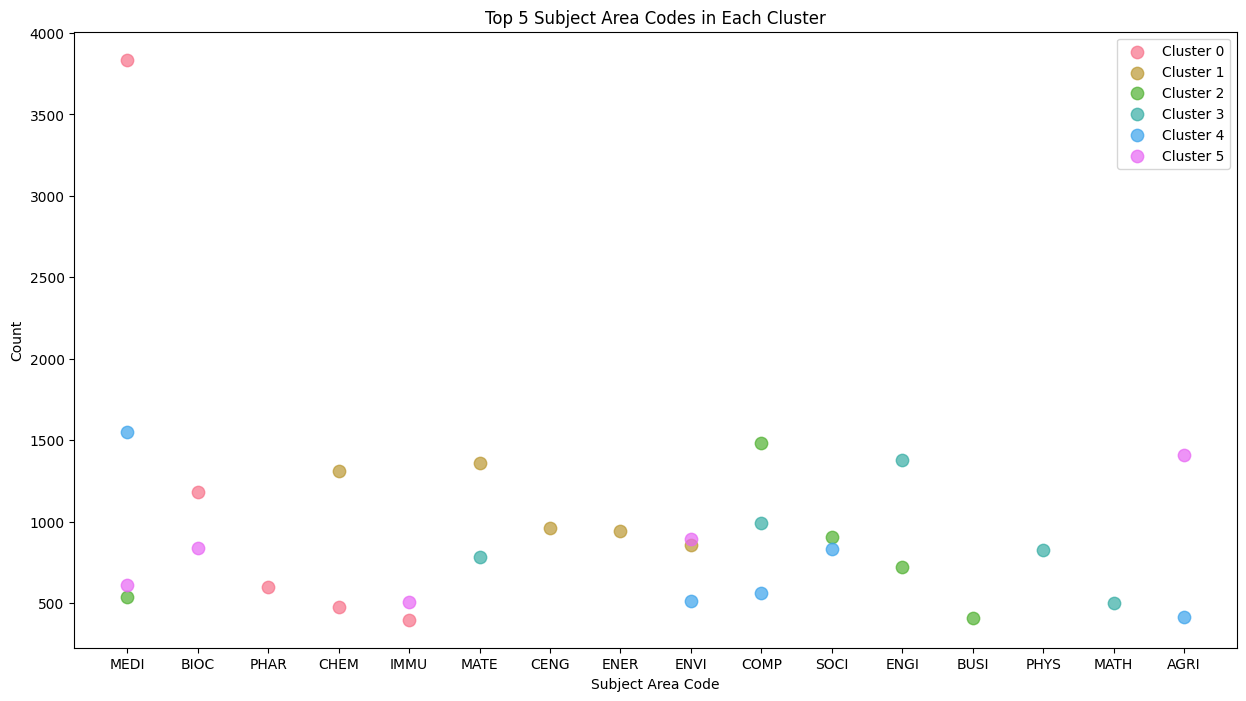

In [ ]:
colors = sns.color_palette('husl', n_colors=len(top_subject_areas_per_cluster['Cluster_by_all'].unique()))

plt.figure(figsize=(15, 8))

for i, (cluster, group) in enumerate(top_subject_areas_per_cluster.groupby('Cluster_by_all')):
    plt.scatter(group['Subject_Area_Code'], group['Count'], marker='o', label=f'Cluster {cluster}', color=colors[i], alpha=0.7, s=80)

plt.title('Top 5 Subject Area Codes in Each Cluster')
plt.xlabel('Subject Area Code')
plt.ylabel('Count')
plt.legend()
plt.show()

<ipython-input-40-314df8da8ce9>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Subject_Area_Code', y='Count', data=cluster_data.head(5), ax=axes[i], errwidth=0, ci='sd', estimator=sum, color='gray', alpha=0.3)
<ipython-input-40-314df8da8ce9>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Subject_Area_Code', y='Count', data=cluster_data.head(5), ax=axes[i], errwidth=0, ci='sd', estimator=sum, color='gray', alpha=0.3)
<ipython-input-40-314df8da8ce9>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Subject_Area_Code', y='Count', data=cluster_data.head(5), ax=axes[i], errwidth=0, ci='sd', estimator=sum, color='gray', alpha=0.3)
<ipython-input-40-314df8da8ce9>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Subject_Area_Code', y='

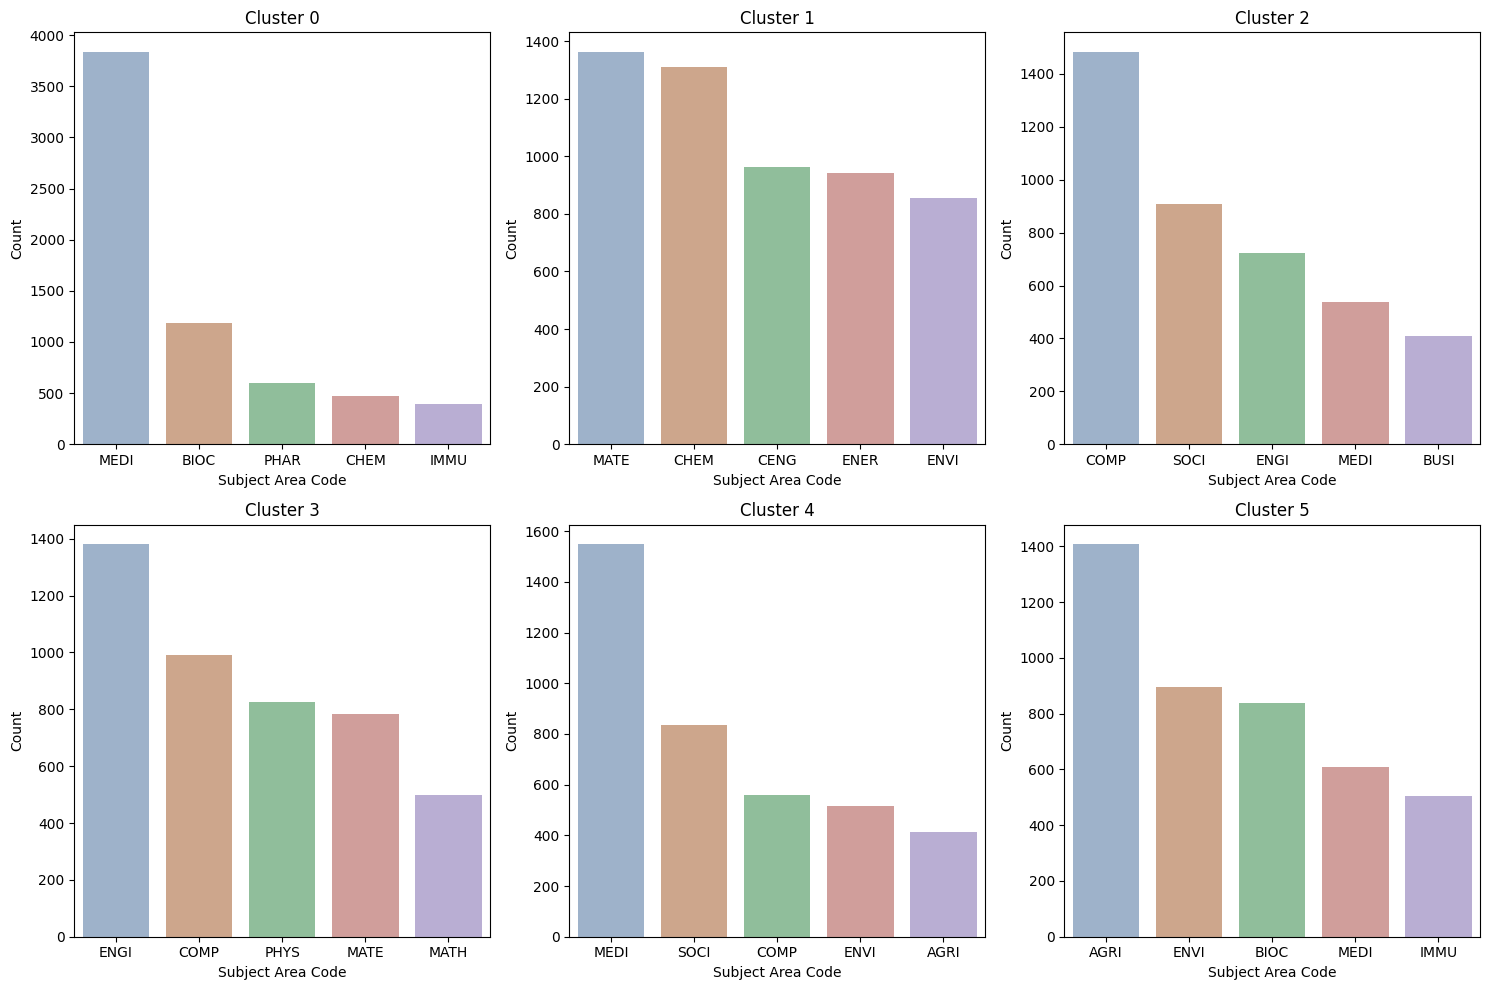

In [ ]:
clusters = top_subject_areas_per_cluster['Cluster_by_all'].unique()

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, cluster in enumerate(clusters):
    cluster_data = top_subject_areas_per_cluster[top_subject_areas_per_cluster['Cluster_by_all'] == cluster]

    colors = sns.color_palette('pastel', n_colors=len(cluster_data.head(5)))

    sns.barplot(x='Subject_Area_Code', y='Count', data=cluster_data.head(5), ax=axes[i], palette=colors)

    sns.barplot(x='Subject_Area_Code', y='Count', data=cluster_data.head(5), ax=axes[i], errwidth=0, ci='sd', estimator=sum, color='gray', alpha=0.3)

    axes[i].set_title(f'Cluster {cluster}')
    axes[i].set_xlabel('Subject Area Code')
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

# Save model and data for viz

In [ ]:
import joblib
joblib.dump(kmeans, '/content/model_phase2_c6.joblib')

['/content/model_phase2_c6.joblib']

In [ ]:
df1.to_excel('/content/dataforviz_p2.xlsx', index=False)

# Demo

In [ ]:
import sys
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
    !wget https://github.com/krprmf/Kingrak.pi/raw/main/DS_DE_TOOL/model/model_phase2_c6.joblib

--2023-12-08 21:43:02--  https://github.com/krprmf/Kingrak.pi/raw/main/DS_DE_TOOL/model/model_phase2_c6.joblib
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/krprmf/Kingrak.pi/main/DS_DE_TOOL/model/model_phase2_c6.joblib [following]
--2023-12-08 21:43:02--  https://raw.githubusercontent.com/krprmf/Kingrak.pi/main/DS_DE_TOOL/model/model_phase2_c6.joblib
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 88251 (86K) [application/octet-stream]
Saving to: ‘model_phase2_c6.joblib.2’

model_phase2_c6.job 100%[===================>]  86.18K  --.-KB/s    in 0.08s   

2023-12-08 21:43:03 (1.10 MB/s) - ‘mo

In [ ]:
import joblib
kmeans = joblib.load('/content/model_phase2_c6.joblib')
kmeans

KMeans(n_clusters=6, random_state=42)

In [ ]:
from sentence_transformers import SentenceTransformer

In [ ]:
embedder = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')

.gitattributes:   0%|          | 0.00/345 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.01k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/555 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/265M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/505 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

In [ ]:
Title = 'Graph Neural Network for Molecular Property Prediction'

In [ ]:
text = preprocess_text(Title)
corpus_text = embedder.encode([text])

In [ ]:
cluster = kmeans.predict(corpus_text)
cluster

array([2], dtype=int32)